In [1]:
import numpy as np

# reading in all data into a NumPy array
all_data = np.loadtxt(open("./wine_data1.csv","r"),
        delimiter=",",
        skiprows=1,
        dtype=np.float64
        )

# load class labels from column 14
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 13 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


In [2]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=500)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


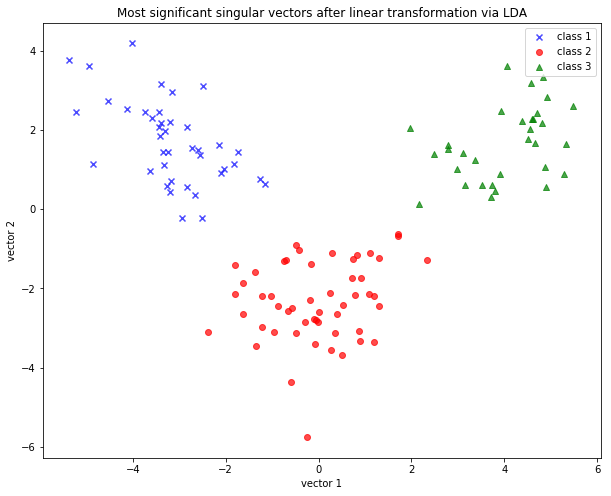

In [5]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2) #similar to PCA
transf_lda = sklearn_lda.fit_transform(X_train, y_train) 

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=transf_lda[:,0][y_train == label],
                y=transf_lda[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

# Lets use this as a linear classifier

In [8]:
from sklearn import metrics
pred_train_lda = lda_clf.predict(X_train)

print('Prediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_lda)))

Prediction accuracy for the training dataset
100.00%


In [9]:
pred_test_lda = lda_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_lda)))

Prediction accuracy for the test dataset
100.00%


In [10]:
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(y_test, lda_clf.predict(X_test)))

Confusion Matrix of the LDA-classifier
[[19  0  0]
 [ 0 19  0]
 [ 0  0 16]]
